# Week 11. In-Class Practice
一個簡單的購物籃分析實作

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_path = "./dataset/store_data.csv"
records = []
with open(data_path) as file:
    for line in file.readlines():
        basket = [i.strip() for i in line.split(",")]
        records.append(basket)
print("Number of records: ", len(records))

Number of records:  7501


### 1. 利用Apriori 找出關聯規則
使用一個以 Python 實作演算法的 library: `mlxtend` <br>
因此需要先行安裝才能繼續執行下去

In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

trans_encoder = TransactionEncoder()
encoded_rec = trans_encoder.fit(records).transform(records)
data = pd.DataFrame(encoded_rec, columns=trans_encoder.columns_) 
data.head()

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


#### i) 用 Apriori 演算法篩選出商品集合

In [4]:
freqent_itemsets = apriori(data, min_support=0.01, use_colnames=True)
freqent_itemsets['length'] = freqent_itemsets['itemsets'].apply(lambda x: len(x))
print("Number of freqent_itemsets:", len(freqent_itemsets))
freqent_itemsets.head()

Number of freqent_itemsets: 257


,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1


#### ii) 設定參數限制，找出高關聯性商品集合與其各項數值

In [5]:
res = association_rules(freqent_itemsets, metric='confidence', min_threshold=0.3)
print("Number of association results:", len(res))
res.head()

Number of association results: 63


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818
2,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921
3,(cereals),(mineral water),0.025730,0.238368,0.010265,0.398964,1.673729,0.004132,1.267198
4,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,0.008497,1.228438


將結果依 lift 值排列

In [6]:
res = res.sort_values("lift", ascending=False)
res.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
56,"(mineral water, ground beef)",(spaghetti),0.040928,0.174110,0.017064,0.416938,2.394681,0.009938,1.416470
50,"(mineral water, frozen vegetables)",(milk),0.035729,0.129583,0.011065,0.309701,2.389991,0.006435,1.260929
22,(soup),(milk),0.050527,0.129583,0.015198,0.300792,2.321232,0.008651,1.244861
16,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
60,"(olive oil, mineral water)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,0.005460,1.315071
45,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
54,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
34,(red wine),(spaghetti),0.028130,0.174110,0.010265,0.364929,2.095966,0.005368,1.300468
33,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048


### 2. 將關聯結果視覺化

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

我們繪製出Lift在關聯規則中的分佈，發現數值都在 1 之上，說明找到的關聯規則都屬於相關事件(Lift < 1 則為互斥事件)

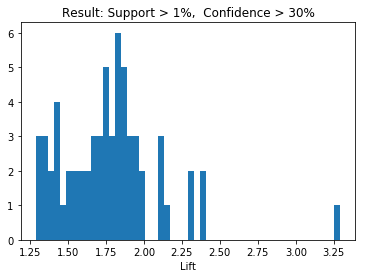

In [8]:
fig, ax = plt.subplots()
ax.hist(res["lift"], bins=50)
ax.set_xlabel("Lift")
plt.title("Result: Support > 1%,  Confidence > 30%")
plt.show()

Support 和 Confidence 為負相關。因為
$$Lift(X,Y) = \frac{N(X,Y)}{N(X)N(Y)} = \frac{\frac{N(X,Y)}{N(X)}}{N(Y)}= \frac{Conf(X,Y)}{N(Y)} =
\frac{\frac{Conf(X,Y)}{N}}{\frac{N(Y)}{N}} = \frac{\frac{Conf(X,Y)}{N}}{Supp(Y)}$$
在 $Lift$ 和 $N$ 給定而有限的情況下，可以由上式得出前述結論。而以下的散佈圖也可以驗證此敘述。

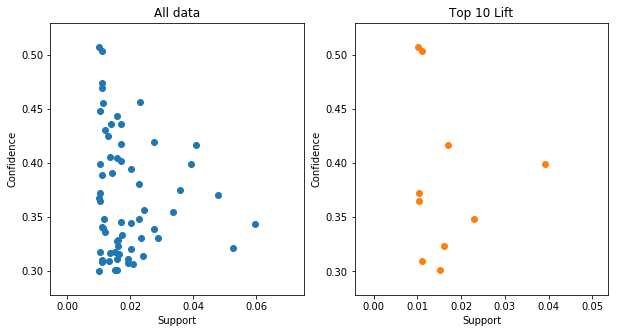

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(res["support"], res["confidence"])
ax[0].set_xlabel("Support")
ax[0].set_ylabel("Confidence")
ax[0].set_title("All data")

ax[1].scatter(res["support"][:10], res["confidence"][:10], color="C1")
ax[1].set_xlabel("Support")
ax[1].set_ylabel("Confidence")
ax[1].set_title("Top 10 Lift")

plt.show()

接著以關聯規則繪製關係網絡

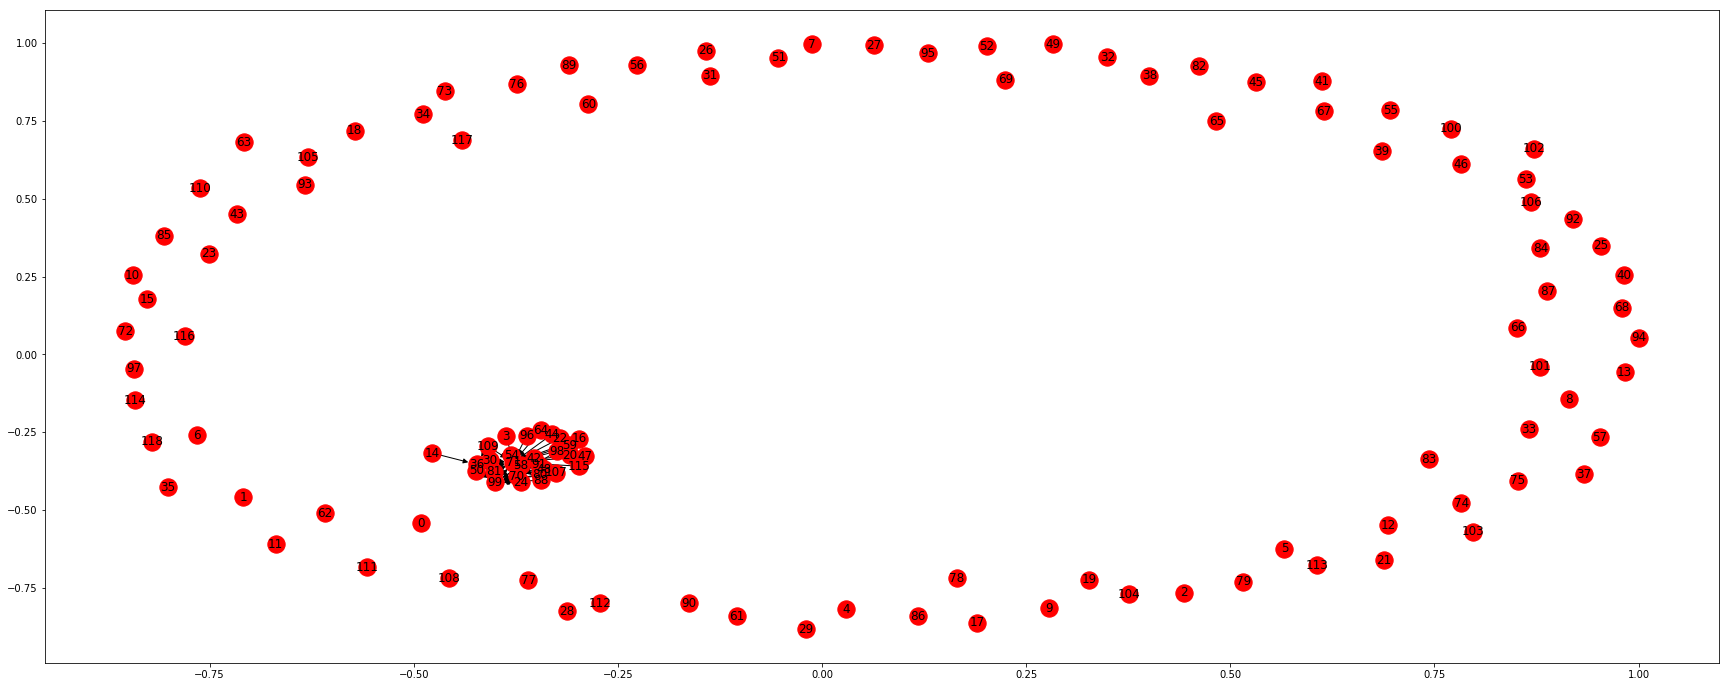

In [10]:
freqent_itemsets_id = apriori(data, min_support=0.01, use_colnames=False)
res_id = association_rules(freqent_itemsets_id, metric='confidence', min_threshold=0.3)

import networkx as nx
assoc_graph = nx.DiGraph()
assoc_graph.add_nodes_from(range(len(data.columns)))

assoc_edges = [(i, (set()|values["consequents"]).pop()) 
                   for index, values in res_id[["antecedents", "consequents"]].iterrows()
                        for i in values["antecedents"]]
assoc_graph.add_edges_from(assoc_edges)

fig, ax = plt.subplots(figsize=(30, 12))
nx.draw_networkx(assoc_graph, ax=ax)
plt.draw()

我們發現只有少數商品在給定的參數門檻值之下具有關聯性，下面將他們獨立繪製成一張圖。

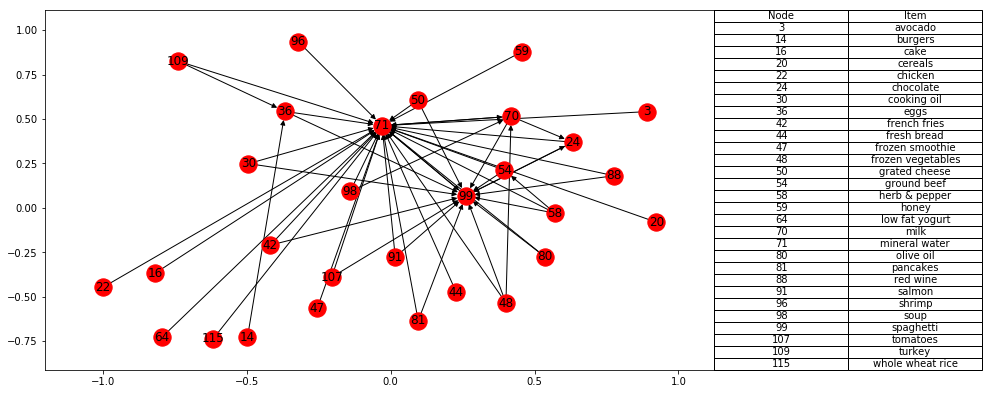

In [11]:
fig, ax = plt.subplots(figsize=(12, 6.61))
nx.draw_networkx(nx.DiGraph(assoc_edges), ax=ax)

involving_nodes = list(set([i for edge in assoc_edges for i in edge]))
involving_items = [[i, data.columns[i]] for i in involving_nodes]
col_labels = ["Node", "Item"]
ax.table(cellText=involving_items,
          cellLoc='center',
          colLabels=col_labels,
          colWidths = [0.2]*len(col_labels),
          loc='right')
plt.draw()

我們可以再加入一些細節，增加視覺化的效果。我們用鄰點數量為節點著色，而得出的數量必須標準化至 0 到 1 之間以對應於色表上。這邊有向圖的鄰點計算，只計算作為源頭的數量而不算尾端的數量。

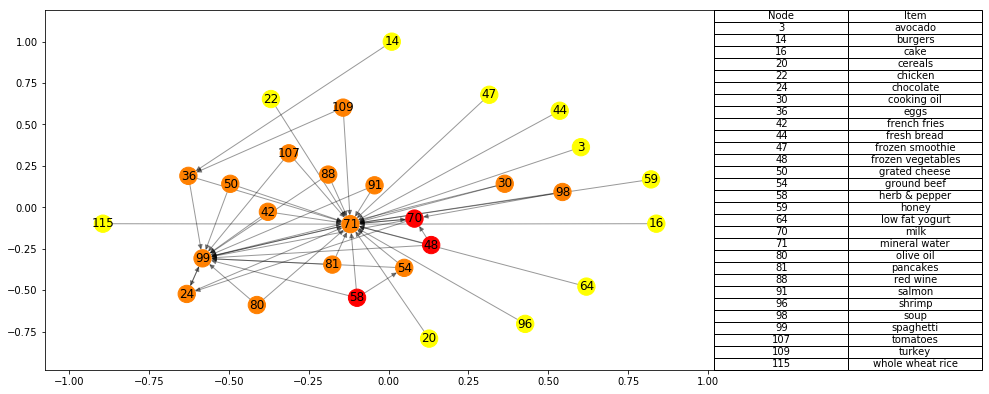

In [12]:
# 關聯規則：把左項、右項和 Lift 值屬性存入節點和網絡
assoc_edges = [(i, (set()|values["consequents"]).pop(), {'weight':values["lift"]}) 
                   for index, values in res_id[["antecedents", "consequents", "lift"]].iterrows()
                        for i in values["antecedents"]]
involving_nodes = list(set([i for edge in assoc_edges for i in edge[0:2]]))
involving_items = [[i, data.columns[i]] for i in involving_nodes]

# 設定網絡圖、輸出節點座標，並製作節點與(鄰點數/最大鄰點數)的 dictionary用來繪製節點顏色
G = nx.DiGraph(assoc_edges)
pos=nx.spring_layout(G) 
max_num_neighbor = max([len([i for i in nx.neighbors(G, node)]) for node in involving_nodes])
p = {node: len([i for i in nx.neighbors(G, node)])/max_num_neighbor for node in involving_nodes}

# 依序繪製連線、節點、節點標籤
fig, ax = plt.subplots(figsize=(12, 6.61))
nx.draw_networkx_edges(G, pos, nodelist=list(p.keys()), alpha=0.4, ax=ax)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()), ax=ax,
                       node_color=list(p.values()),
                       cmap=plt.cm.autumn_r)
nx.draw_networkx_labels(G, pos, nodelist=list(p.keys()), ax=ax, labels={i:i for i in pos.keys()})

# 輸出對照表
col_labels = ["Node", "Item"]
ax.table(cellText=involving_items,
          cellLoc='center',
          colLabels=col_labels,
          colWidths = [0.2]*len(col_labels),
          loc='right')
plt.draw()

無向圖的鄰點計算，會同時計算二端的數量，因此可以看出哪個商品與其他東西的重複出現率較高。

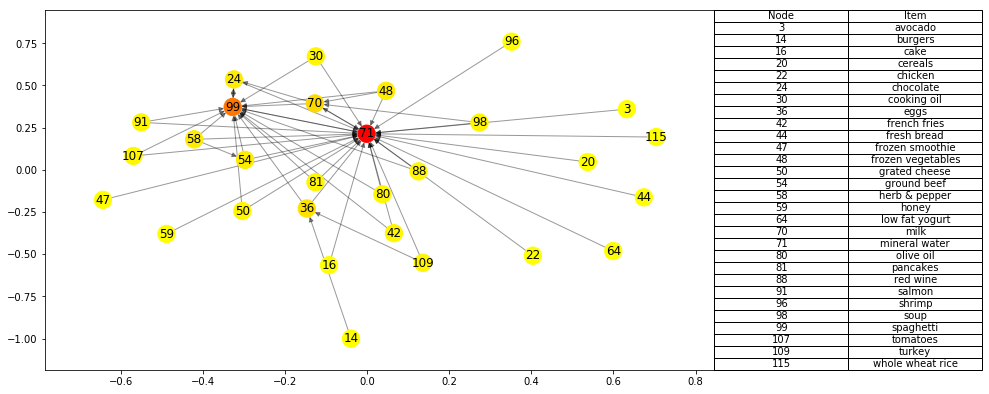

In [13]:
# 設定無向網絡圖、製作節點與(鄰點數/最大鄰點數)的 dictionary用來繪製節點顏色
G = nx.Graph(assoc_edges)
max_num_neighbor = max([len([i for i in nx.neighbors(G, node)]) for node in involving_nodes])
p = {node: len([i for i in nx.neighbors(G, node)])/max_num_neighbor for node in involving_nodes}

# 設定有向網絡圖、輸出節點座標
G = nx.DiGraph(assoc_edges)
pos=nx.spring_layout(G)

# 依序繪製連線、節點、節點標籤
fig, ax = plt.subplots(figsize=(12, 6.61))
nx.draw_networkx_edges(G, pos, nodelist=list(p.keys()), alpha=0.4, ax=ax)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()), ax=ax,
                       node_color=list(p.values()),
                       cmap=plt.cm.autumn_r)
nx.draw_networkx_labels(G, pos, nodelist=list(p.keys()), ax=ax, labels={i:i for i in pos.keys()})

# 輸出對照表
col_labels = ["Node", "Item"]
ax.table(cellText=involving_items,
          cellLoc='center',
          colLabels=col_labels,
          colWidths = [0.2]*len(col_labels),
          loc='right')
plt.draw()

最後把 Lift 的大小以連線顏色的深淺標示出來

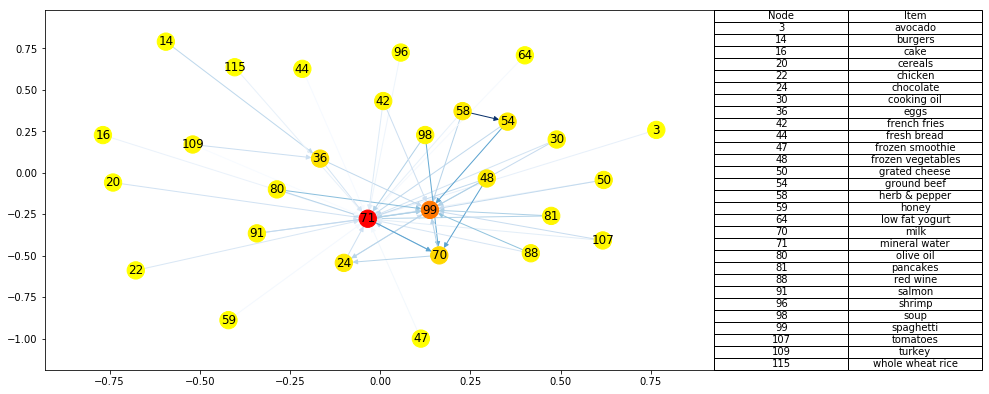

In [14]:
# 設定無向網絡圖、製作節點與(鄰點數/最大鄰點數)的 dictionary用來繪製節點顏色、製作連線顏色
G = nx.Graph(assoc_edges)
max_num_neighbor = max([len([i for i in nx.neighbors(G, node)]) for node in involving_nodes])
p = {node: len([i for i in nx.neighbors(G, node)])/max_num_neighbor for node in involving_nodes}
e = {tuple(edge[0:2]):edge[2]["weight"]/4  for edge in assoc_edges} # Lift 最大值為 3.xx ，取 4 大概去標準化

# 設定有向網絡圖、輸出節點座標
G = nx.DiGraph(assoc_edges)
pos=nx.spring_layout(G)

# 依序繪製連線、節點、節點標籤
fig, ax = plt.subplots(figsize=(12, 6.61))
nx.draw_networkx_edges(G, pos, nodelist=list(p.keys()), ax=ax,
                       edgelist=list(e.keys()), 
                       edge_color=list(e.values()),
                       edge_cmap=plt.cm.Blues)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()), ax=ax,
                       node_color=list(p.values()),
                       cmap=plt.cm.autumn_r)
nx.draw_networkx_labels(G, pos, nodelist=list(p.keys()), ax=ax, labels={i:i for i in pos.keys()})

# 輸出對照表
col_labels = ["Node", "Item"]
ax.table(cellText=involving_items,
          cellLoc='center',
          colLabels=col_labels,
          colWidths = [0.2]*len(col_labels),
          loc='right')
plt.draw()

#